# ***Seller Performance: Incubation Phase Analysis***

In this project, I analyze seller performance during the **Incubation Phase** using a real dataset from a major **Brazilian e-commerce platform (Olist)**.
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce and https://www.kaggle.com/datasets/olistbr/marketing-funnel-olist

Through a combination of **Exploratory Data Analysis (EDA)**, **cohort retention**, **time-to-first-order analysis**, and **seller segmentation**, this project aims to uncover:


1. The factor that determine time-to-first order
2. Retention rate analysis after first-order (Incubation phase)



I hope this portfolio can serve as a strong proof of my **dedication, analytical capability, and domain knowledge** in the e-commerce ecosystem.  

Through this project, I aim to demonstrate my understanding of how platforms like **Shopee** operate—from seller onboarding and activation, to incubation, retention, and performance management.  

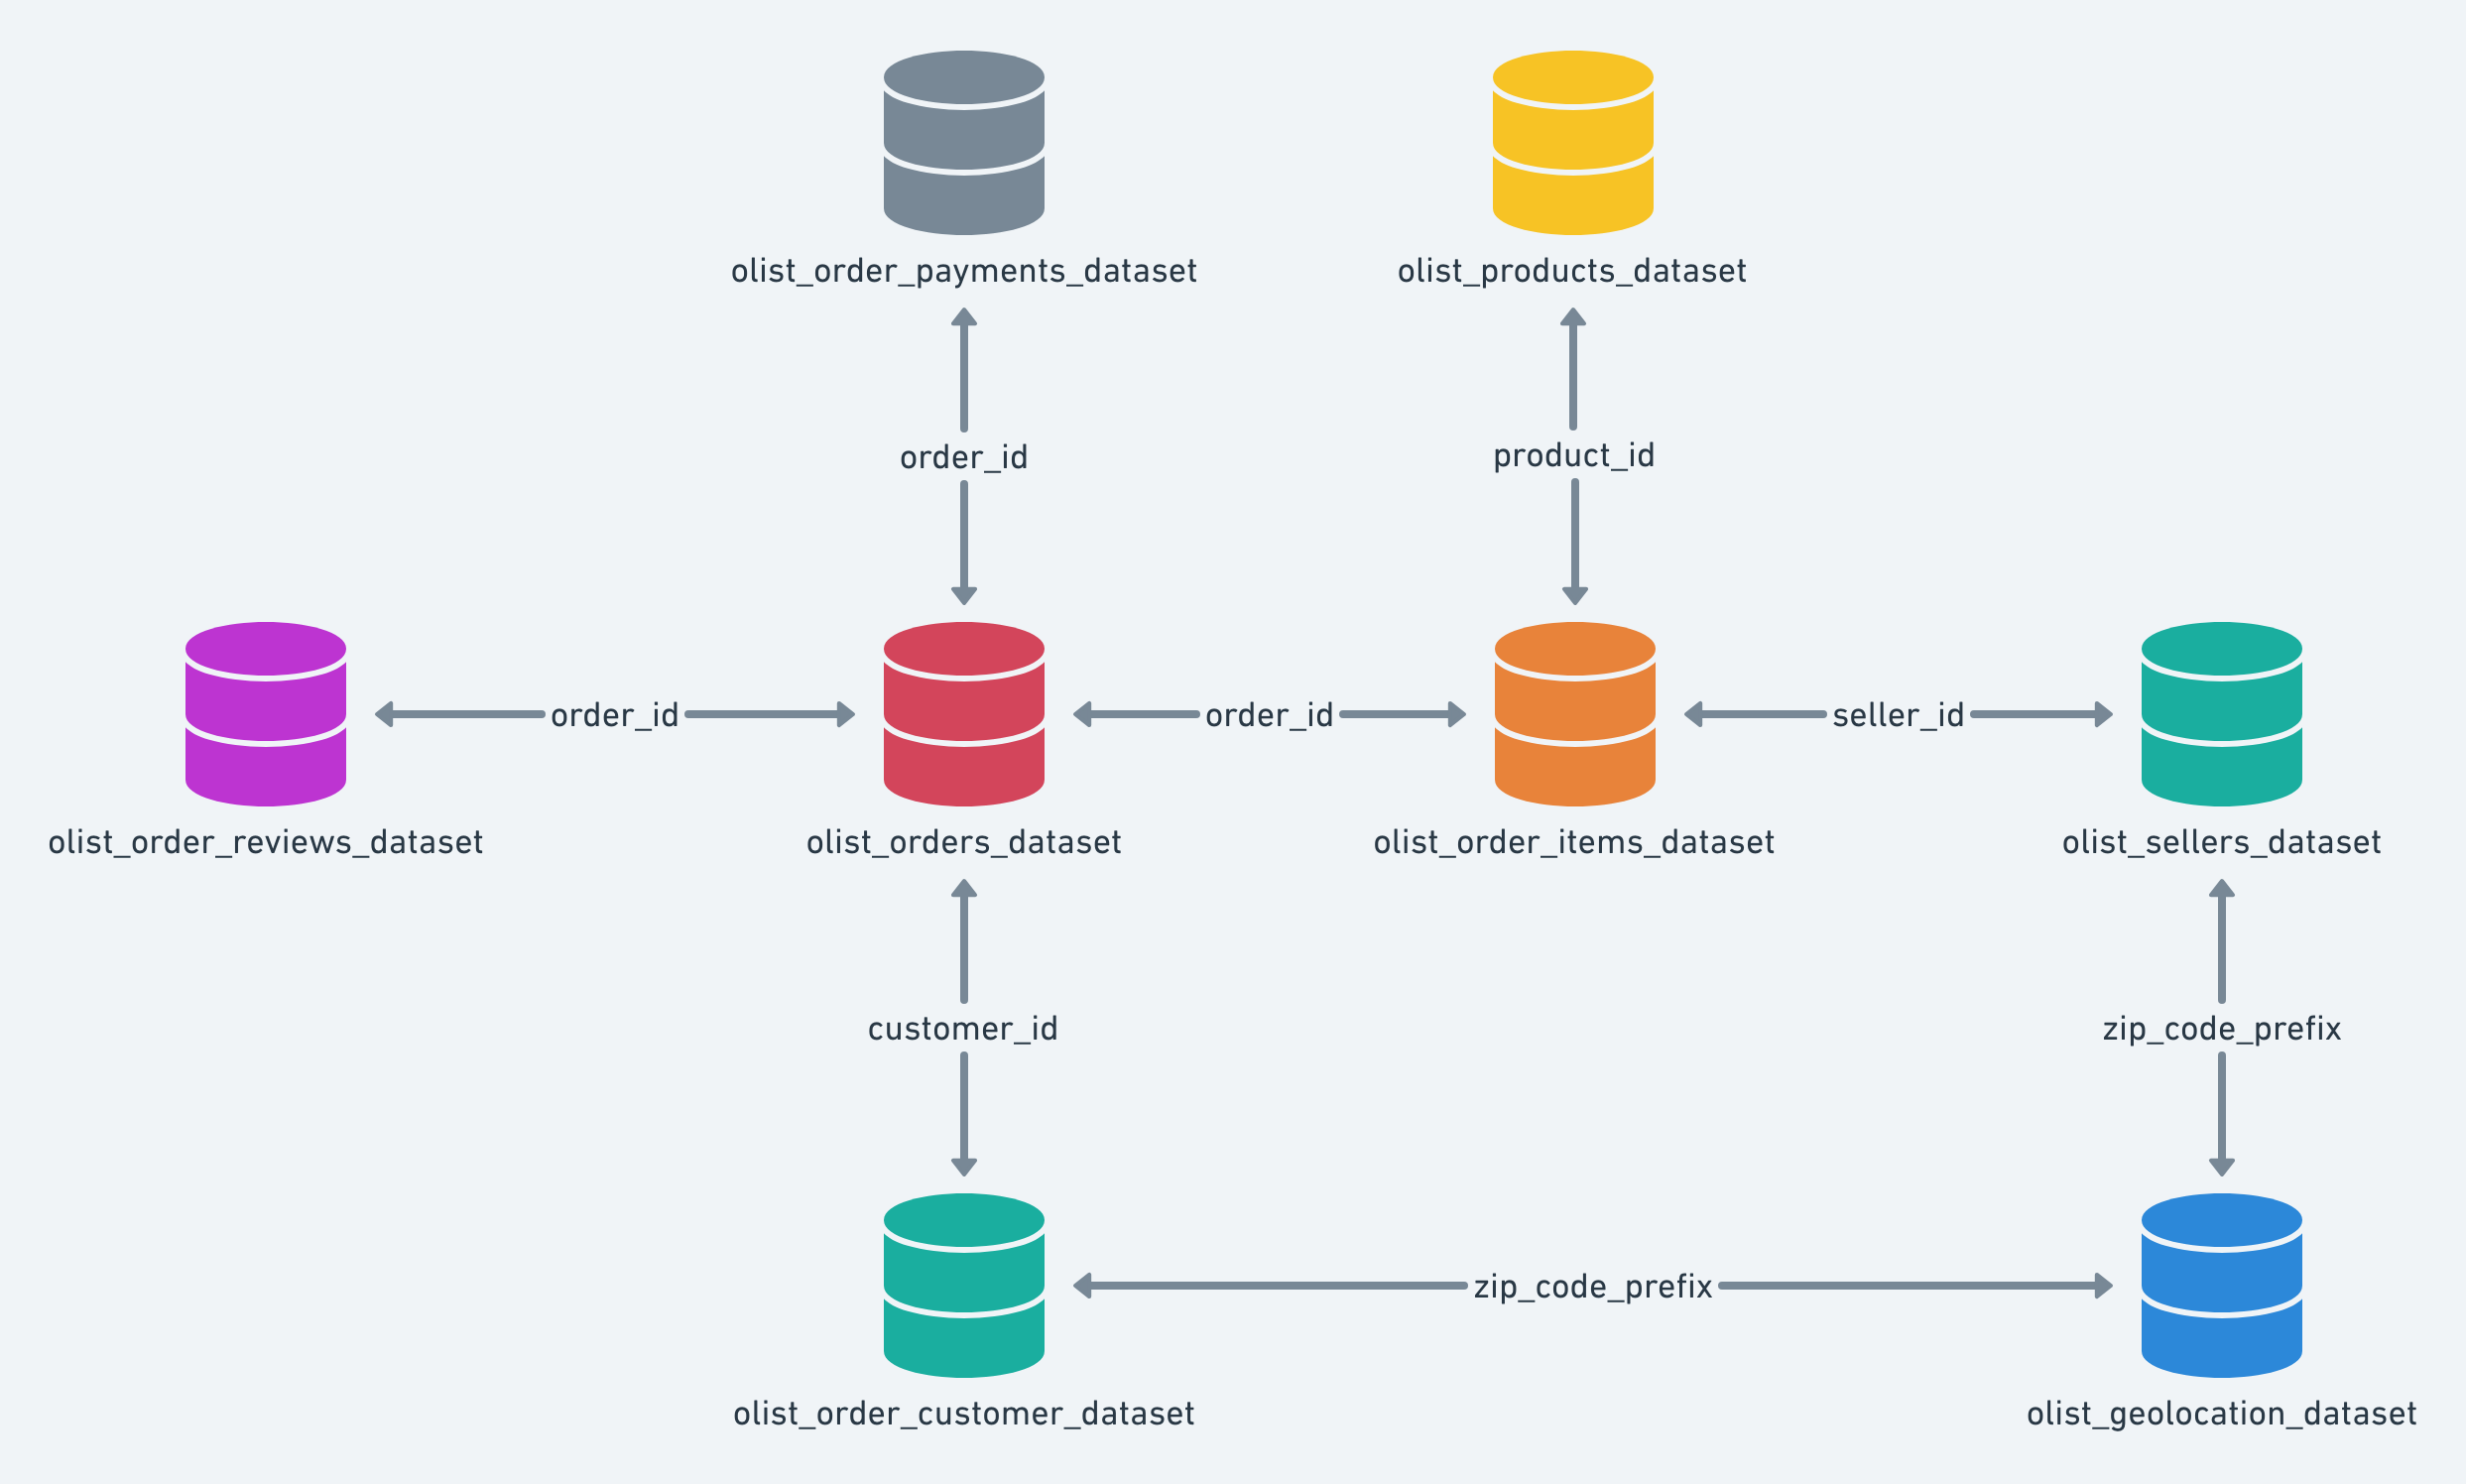

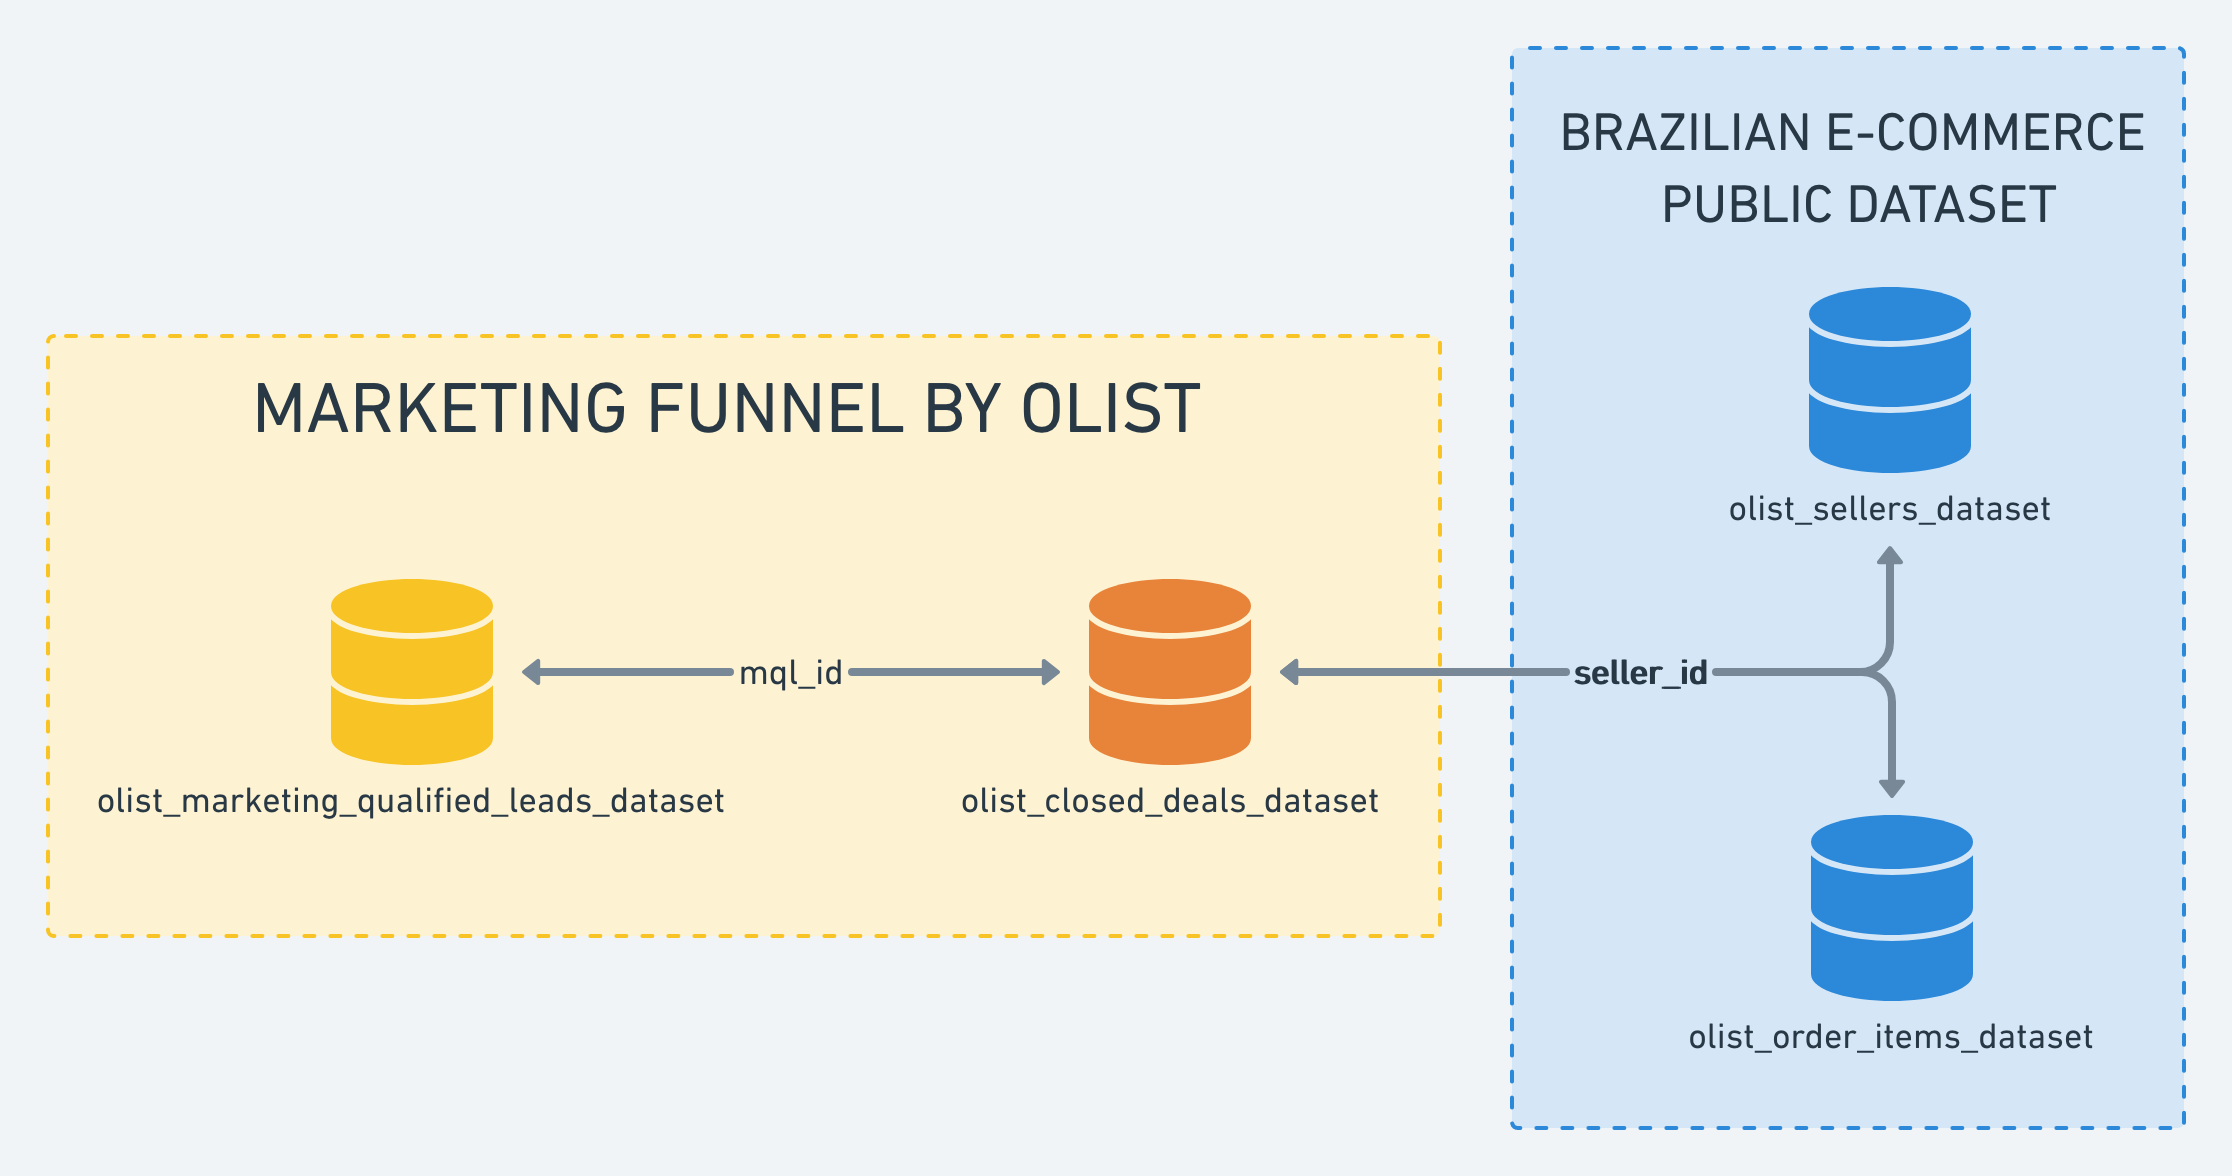

In [32]:
#libararies

import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [33]:
#Importing Datasets


# Customers
olist_customers_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_customers_dataset.csv')

# Geolocation
olist_geolocation_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_geolocation_dataset.csv')

# Order Items
olist_order_items_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_order_items_dataset.csv')

# Order Payments
olist_order_payments_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_order_payments_dataset.csv')

# Order Reviews
olist_order_reviews_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_order_reviews_dataset.csv')

# Orders
olist_orders_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_orders_dataset.csv')

# Products
olist_products_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_products_dataset.csv')

# Sellers
olist_sellers_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_sellers_dataset.csv')

# Category Name Translation
product_category_name_translation = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\product_category_name_translation.csv')

# Closed Deals (Olist marketing funnel)
olist_closed_deals_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_closed_deals_dataset.csv')

# Marketing Qualified Leads
olist_marketing_qualified_leads_dataset = pd.read_csv(
    r'C:\Users\Admin\Desktop\archive (1)\olist_marketing_qualified_leads_dataset.csv')


# 1. Factor that determine time-to-first order

- Fist, I have to find the new seller that recently joined:

In [34]:
new_seller_order = olist_order_items_dataset[olist_order_items_dataset['seller_id'].isin(olist_closed_deals_dataset['seller_id'])]
new_seller_order
olist_closed_deals_dataset

,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,NaN,NaN,NaN,reseller,NaN,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,NaN,NaN,NaN,manufacturer,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
838,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
839,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
840,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


In [35]:
new_seller_order_added = new_seller_order.merge(olist_orders_dataset, how = 'left', on = 'order_id')
new_seller_order_added.head(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,351d3cb2cee3c7fd0af6616c82df21d3,delivered,2018-07-02 13:59:39,2018-07-02 14:10:56,2018-07-03 14:25:00,2018-07-04 17:28:31,2018-07-23 00:00:00
1,001ac194d4a326a6fa99b581e9a3d963,1,dbaee28f4ee64465838a229582d77520,ffc470761de7d0232558ba5e786e57b7,2018-07-10 02:51:10,54.00,8.54,f4f17ada91ef010cbde3892ae54e625f,delivered,2018-07-04 11:39:11,2018-07-06 02:51:10,2018-07-06 08:58:00,2018-07-12 17:48:49,2018-07-17 00:00:00
2,0029f17cf0e7640c5cb6825af681303f,1,01c666c82f414c762ad21bffa56e8b49,d3dcf0604eabf0224fbd5948b5e02f69,2018-05-08 12:14:52,94.90,18.54,687223424c00a708c168301ebb8d16ef,delivered,2018-05-02 11:59:06,2018-05-02 12:14:52,2018-05-03 12:12:00,2018-05-10 23:42:18,2018-05-22 00:00:00
3,00335f75ea6a4455b524a8dd177067f5,1,e1bf2f209fd2b08e1af3ed71732d9008,70c27847eca8195c983ed7e798c56743,2018-05-02 22:10:29,168.80,8.21,32b84239e3f3904ac162d832454770c7,delivered,2018-04-25 21:47:26,2018-04-25 22:10:29,2018-04-27 14:49:00,2018-05-03 22:16:51,2018-05-28 00:00:00
4,00345f338696283410b7977d2e3efc89,1,0f2fd0a589cb7849c1dbedbd4109c2f8,516e7738bd8f735ac19a010ee5450d8d,2018-08-23 15:11:40,48.90,18.44,3f9d223f86d2f243dd5a85fdc286c62a,delivered,2018-08-20 11:06:46,2018-08-20 15:12:10,2018-08-21 13:18:00,2018-08-30 21:13:48,2018-09-11 00:00:00


In [36]:
new_seller_order_added[['order_id','seller_id','order_purchase_timestamp']]


,order_id,seller_id,order_purchase_timestamp
0,0005f50442cb953dcd1d21e1fb923495,ba143b05f0110f0dc71ad71b4466ce92,2018-07-02 13:59:39
1,001ac194d4a326a6fa99b581e9a3d963,ffc470761de7d0232558ba5e786e57b7,2018-07-04 11:39:11
2,0029f17cf0e7640c5cb6825af681303f,d3dcf0604eabf0224fbd5948b5e02f69,2018-05-02 11:59:06
3,00335f75ea6a4455b524a8dd177067f5,70c27847eca8195c983ed7e798c56743,2018-04-25 21:47:26
4,00345f338696283410b7977d2e3efc89,516e7738bd8f735ac19a010ee5450d8d,2018-08-20 11:06:46
...,...,...,...
5039,ff96d596c25445650eee60b94fa62244,7238a95bb63ef7e498389fb863b834a1,2018-04-27 14:01:01
5040,ff977ea68e67d2606fdb5981ae3d9cc5,c013e57c075a06e5b5c48ee03c525719,2018-05-18 20:10:59
5041,ffbcbeeac5c9c9495cd729f896bc1d5f,3d3ccf2b2f8134b10dce9dd446f0e075,2018-06-20 21:14:59
5042,ffc0249fed109d5d056d7c79b7fa7dd9,7ff588a03c2aeae4fbd23f9ae64b760d,2018-08-13 14:32:07


- After some merging and filtering, I have a table contain new seller_id and their order_purchase_timestamp

In [37]:
df_earliest = (
    new_seller_order_added
    .groupby('seller_id')['order_purchase_timestamp']
    .min()
    .reset_index()
)
df_earliest.head(5)

,seller_id,order_purchase_timestamp
0,01266d4c46afa519678d16a8b683d325,2018-08-02 16:07:38
1,01fd077212124329bac32490e8ef80d9,2018-04-16 10:44:09
2,02f623a8eb246f3c5f7c2f96462654e6,2018-04-25 15:13:02
3,03a2a6dcbe45d639c4dc2a0d24769c40,2018-03-13 08:11:07
4,044668ccd5316b12a7cf0d54a156e3e9,2018-08-08 17:54:25


In [38]:
time = df_earliest.merge(olist_closed_deals_dataset, how ='left', on = 'seller_id' )[['seller_id','order_purchase_timestamp','won_date']]
time

,seller_id,order_purchase_timestamp,won_date
0,01266d4c46afa519678d16a8b683d325,2018-08-02 16:07:38,2018-05-18 20:02:04
1,01fd077212124329bac32490e8ef80d9,2018-04-16 10:44:09,2018-03-28 22:45:45
2,02f623a8eb246f3c5f7c2f96462654e6,2018-04-25 15:13:02,2018-04-18 20:16:19
3,03a2a6dcbe45d639c4dc2a0d24769c40,2018-03-13 08:11:07,2018-02-09 18:11:10
4,044668ccd5316b12a7cf0d54a156e3e9,2018-08-08 17:54:25,2018-01-31 21:00:13
...,...,...,...
375,fd435faa3c0422b60440ea3480d0e77c,2018-08-20 07:36:53,2018-07-26 17:03:01
376,fe87f472055fbcf1d7e691c00b1560dc,2018-05-07 13:09:18,2018-01-23 12:41:16
377,ffa6adafb71b807dc13159e26431354c,2018-03-16 07:38:09,2018-02-20 17:44:19
378,ffad1e7127fb622cb64a900751590acd,2018-03-13 14:21:08,2018-02-02 20:42:47


In [39]:
time['order_purchase_timestamp'] = pd.to_datetime(
    time['order_purchase_timestamp'],
    errors='coerce'
)

time['won_date'] = pd.to_datetime(
    time['won_date'],
    errors='coerce'
)

time[['order_purchase_timestamp', 'won_date']].dtypes


order_purchase_timestamp    datetime64[ns]
won_date                    datetime64[ns]
dtype: object

- After that I calculate the number of days from won_date (contract signing date) to their first order

In [40]:
time['first_order_time'] = time['order_purchase_timestamp'] - time['won_date']
time['first_order_days'] = time['first_order_time'].dt.days
time

,seller_id,order_purchase_timestamp,won_date,first_order_time,first_order_days
0,01266d4c46afa519678d16a8b683d325,2018-08-02 16:07:38,2018-05-18 20:02:04,75 days 20:05:34,75
1,01fd077212124329bac32490e8ef80d9,2018-04-16 10:44:09,2018-03-28 22:45:45,18 days 11:58:24,18
2,02f623a8eb246f3c5f7c2f96462654e6,2018-04-25 15:13:02,2018-04-18 20:16:19,6 days 18:56:43,6
3,03a2a6dcbe45d639c4dc2a0d24769c40,2018-03-13 08:11:07,2018-02-09 18:11:10,31 days 13:59:57,31
4,044668ccd5316b12a7cf0d54a156e3e9,2018-08-08 17:54:25,2018-01-31 21:00:13,188 days 20:54:12,188
...,...,...,...,...,...
375,fd435faa3c0422b60440ea3480d0e77c,2018-08-20 07:36:53,2018-07-26 17:03:01,24 days 14:33:52,24
376,fe87f472055fbcf1d7e691c00b1560dc,2018-05-07 13:09:18,2018-01-23 12:41:16,104 days 00:28:02,104
377,ffa6adafb71b807dc13159e26431354c,2018-03-16 07:38:09,2018-02-20 17:44:19,23 days 13:53:50,23
378,ffad1e7127fb622cb64a900751590acd,2018-03-13 14:21:08,2018-02-02 20:42:47,38 days 17:38:21,38


- I divided it into some milestone 7, 14, 30. 60 days to see which seller can have first order in that period of time

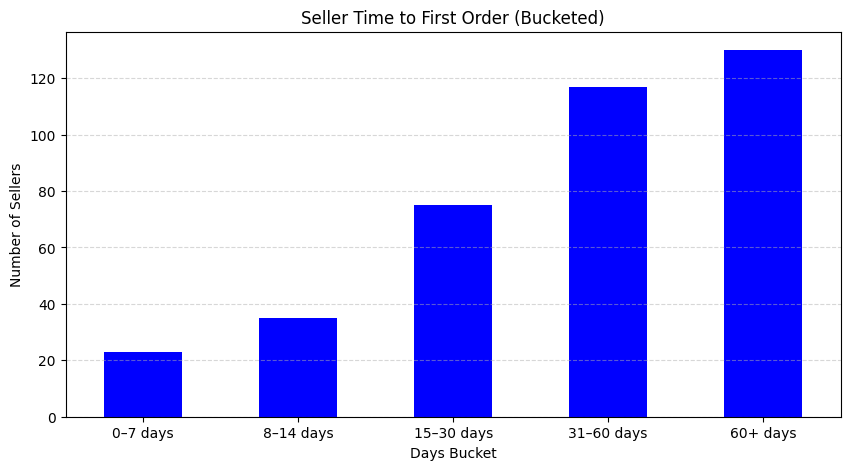

In [41]:


bins = [0, 7, 14, 30, 60, 9999]
labels = ['0–7 days', '8–14 days', '15–30 days', '31–60 days', '60+ days']

time['bucket'] = pd.cut(time['first_order_days'], bins=bins, labels=labels, right=True)


bucket_counts = time['bucket'].value_counts().sort_index()


plt.figure(figsize=(10,5))
bucket_counts.plot(kind='bar', color='blue')

plt.title('Seller Time to First Order (Bucketed)')
plt.xlabel('Days Bucket')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

- It is apparent that just more than 20 sellers have first order in 7 days, the majority of sellers have theirs first order even after 2 months, now I want to see what affects the time that takes them to have their first order.

- I state a hypothesis that, maybe the product category plays a huge role here, since there are some categories that have faster flowing than the others

In [42]:
df_seller_analyse = (
    new_seller_order_added
        .groupby("seller_id")
        .agg(
            order_count       = ("order_id", "count"),
            total_price       = ("price", "sum"),
            avg_price_per_order = ("price", "mean")
        )
        
        .merge(time, how="left", on="seller_id")
       
        [[
            "seller_id",
            "order_count",
            "total_price",
            "avg_price_per_order",
            "won_date",
            "first_order_days",
            "bucket"
        ]]
         .merge(olist_closed_deals_dataset, how='left', on='seller_id')
        .reset_index()
)
df_seller_analyse.head(5)

,index,seller_id,order_count,total_price,avg_price_per_order,won_date_x,first_order_days,bucket,mql_id,sdr_id,...,won_date_y,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,0,01266d4c46afa519678d16a8b683d325,3,90.25,30.083333,2018-05-18 20:02:04,75,60+ days,ae437864746ae2a9e694a6ed2b5824db,4b339f9567d060bcea4f5136b9f5949e,...,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,1,01fd077212124329bac32490e8ef80d9,39,1208.00,30.974359,2018-03-28 22:45:45,18,15–30 days,180d9ac0990bb42907fe9cc7aa3eb5a1,09285259593c61296eef10c734121d5b,...,2018-03-28 22:45:45,household_utilities,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
2,2,02f623a8eb246f3c5f7c2f96462654e6,44,6378.00,144.954545,2018-04-18 20:16:19,6,0–7 days,ffdd99e05df27c02a2fb1669d49e0c76,370c9f455f93a9a96cbe9bea48e70033,...,2018-04-18 20:16:19,sports_leisure,online_medium,eagle,NaN,NaN,NaN,reseller,NaN,0.0
3,3,03a2a6dcbe45d639c4dc2a0d24769c40,9,1078.41,119.823333,2018-02-09 18:11:10,31,31–60 days,586e57a7ef16035bd85e2dcf44248130,de63de0d10a6012430098db33c679b0b,...,2018-02-09 18:11:10,construction_tools_house_garden,online_beginner,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,4,044668ccd5316b12a7cf0d54a156e3e9,4,137.80,34.450000,2018-01-31 21:00:13,188,60+ days,5985e72b3752e4749926885db1b45be4,56bf83c4bb35763a51c2baab501b4c67,...,2018-01-31 21:00:13,food_drink,offline,NaN,NaN,NaN,NaN,reseller,NaN,0.0


In [43]:
category_analyse = df_seller_analyse[['business_segment','first_order_days']].groupby('business_segment').mean().reset_index()
category_analyse.head(5)


,business_segment,first_order_days
0,air_conditioning,87.000000
1,audio_video_electronics,45.032258
2,baby,39.333333
3,bags_backpacks,42.857143
4,bed_bath_table,33.200000


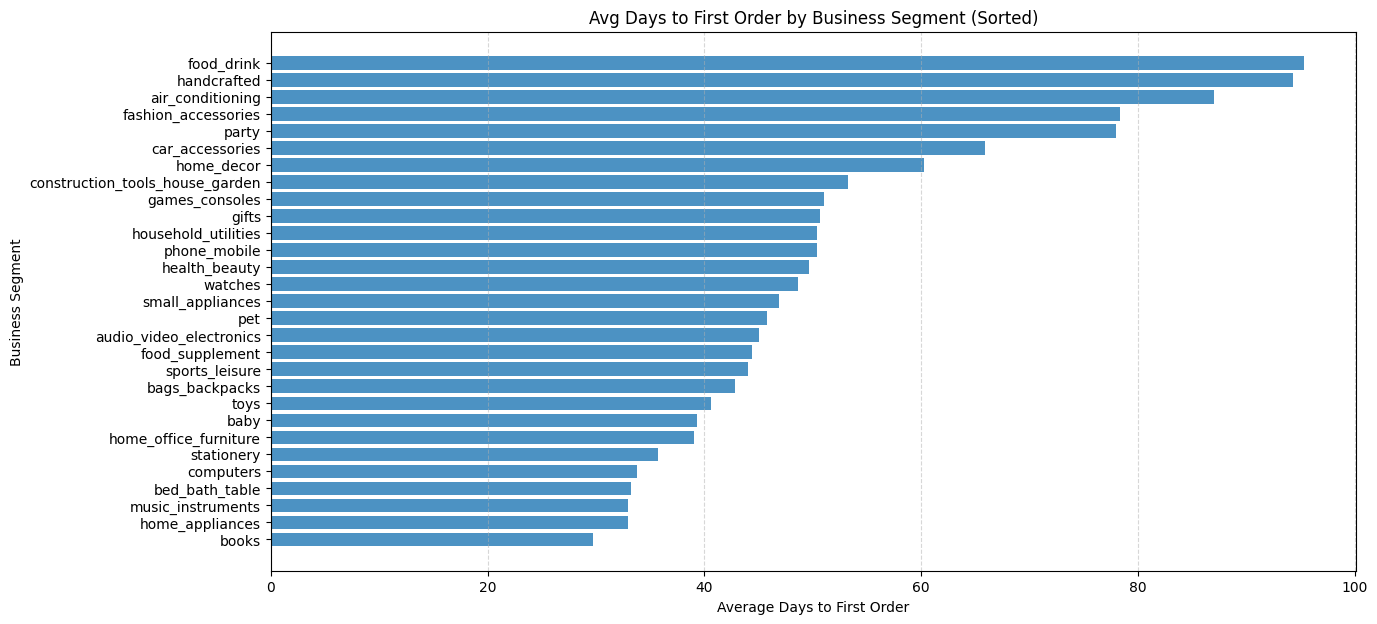

In [44]:

category_sorted = category_analyse.sort_values("first_order_days", ascending=True)

plt.figure(figsize=(14, 7))

plt.barh(
    category_sorted["business_segment"],
    category_sorted["first_order_days"],
    alpha=0.8
)

plt.xlabel("Average Days to First Order")
plt.ylabel("Business Segment")
plt.title("Avg Days to First Order by Business Segment (Sorted)")
plt.grid(axis='x', linestyle='--', alpha=0.5)

plt.show()


Insight Summary:

- Categories like books, music instruments, and home appliances reach their first order fastest, suggesting strong baseline demand and simple buyer decision cycles.

- Meanwhile, food_drink, handcrafted, air_conditioning, and fashion_accessories take much longer, likely due to competition, trust concerns, or longer consideration time.

- The wide gap between segments shows that time to first order is heavily category-dependent, not just seller-dependent.

=> For incubation, this means different categories require different levels of support, expectation setting, and SR resource allocation.

***Analyse the new seller that have no order yet to see what is their problems***

In [45]:
no_order = olist_closed_deals_dataset[
    ~olist_closed_deals_dataset["seller_id"].isin(time["seller_id"])].reset_index(drop=True)

no_order


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,NaN,NaN,NaN,reseller,NaN,0.0
1,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,NaN,NaN,NaN,NaN,reseller,NaN,0.0
2,c3e30ed7ac989117c7e1e719b4ac128f,92d7568ad0c5c76fd7d341b2d46f24d6,4b339f9567d060bcea4f5136b9f5949e,85fc447d336637ba1df43e793199fbc8,2018-04-16 18:18:22,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
3,a90a37898cc5f2718385a2fb981caaff,0b28859cd04d23edefee9c591fb03cd8,f42a2bd194f7802ab052a815c8de65b7,6565aa9ce3178a5caf6171827af3a9ba,2018-05-14 18:37:15,household_utilities,offline,eagle,NaN,NaN,NaN,reseller,NaN,0.0
4,4e4e70d504b4c0006c8287dedc99d0fc,f7a0d94e966c5665355a182d5b199fcf,fdb16d3cbbeb5798f2f66c4096be026d,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-28 19:42:14,construction_tools_house_garden,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,df9a2abe2ad3f2d8758b675ac8331ecf,bfcc27719640628da877db48b672b169,45749fb708130f78d0db07d8d80f030b,a8387c01a09e99ce014107505b92388c,2018-08-01 20:22:31,home_decor,offline,cat,NaN,NaN,NaN,reseller,NaN,0.0
458,8723201570415eb23b4f095d8c20a27c,4a82eab98441aeb64566e2776c1fb2b6,370c9f455f93a9a96cbe9bea48e70033,4b339f9567d060bcea4f5136b9f5949e,2018-09-27 18:58:41,construction_tools_house_garden,online_big,wolf,NaN,NaN,NaN,reseller,132.0,200000.0
459,2e57665b8faf05c967a801eb5aedfa0a,55031883943971ca22db6894574cfe2c,370c9f455f93a9a96cbe9bea48e70033,a8387c01a09e99ce014107505b92388c,2018-06-06 20:15:26,computers,online_medium,wolf,NaN,NaN,NaN,reseller,NaN,0.0
460,40955be51cc85c5a5a6cdd12b19e9f10,c0e933c238e41f0cd459d6025ee9b364,068066e24f0c643eb1d089c7dd20cd73,d3d1e91a157ea7f90548eef82f1955e3,2018-03-06 15:52:23,pet,online_beginner,cat,NaN,NaN,NaN,reseller,NaN,0.0


- Some categories that struggle with having their order even after months of activaton can see as below:

In [46]:
no_order_analyse = (
    no_order.groupby("business_segment")
            .size()
            .reset_index(name="count")
            .sort_values("count", ascending=True)
            
)
no_order_analyse.head(5)


,business_segment,count
0,air_conditioning,1
12,games_consoles,1
27,religious,1
13,gifts,2
16,home_appliances,2


In [47]:
latest_timestamp = olist_orders_dataset['order_purchase_timestamp'].max()
latest_timestamp = pd.to_datetime(latest_timestamp).date()
latest_timestamp

datetime.date(2018, 10, 17)

- No order period of time of these categories:

In [48]:

filtered_no_order_cat = no_order_analyse[
    ~no_order_analyse['business_segment'].isin(category_analyse['business_segment'])
]


earliest = (
    olist_closed_deals_dataset
        .groupby('business_segment')['won_date']
        .min()
        .reset_index()
        .rename(columns={'won_date': 'earliest_won_date'})
)

result = filtered_no_order_cat.merge(earliest, on='business_segment', how='left')


result['earliest_won_date'] = pd.to_datetime(result['earliest_won_date'])

latest_timestamp = pd.to_datetime(latest_timestamp)

result['no_order_day'] = latest_timestamp - result['earliest_won_date']

result


,business_segment,count,earliest_won_date,no_order_day
0,religious,1,2018-04-06 16:27:35,193 days 07:32:25
1,perfume,2,2018-08-14 13:56:57,63 days 10:03:03
2,other,3,2018-11-09 20:06:38,-24 days +03:53:22
3,jewerly,8,2018-02-22 12:40:15,236 days 11:19:45


- This indicates that certain segments take much longer to generate orders, meaning sellers in these categories face slower demand or longer buyer decision cycles.

- Secondly, I investigate if the time-to-first order depends on lead_type of the sellers

In [49]:
leadtype_analyse = df_seller_analyse[['lead_type','first_order_days']].groupby('lead_type').mean().reset_index()
leadtype_analyse

,lead_type,first_order_days
0,industry,50.560976
1,offline,66.433333
2,online_beginner,42.523810
3,online_big,43.392405
4,online_medium,54.715116
5,online_small,49.892857
6,online_top,26.500000


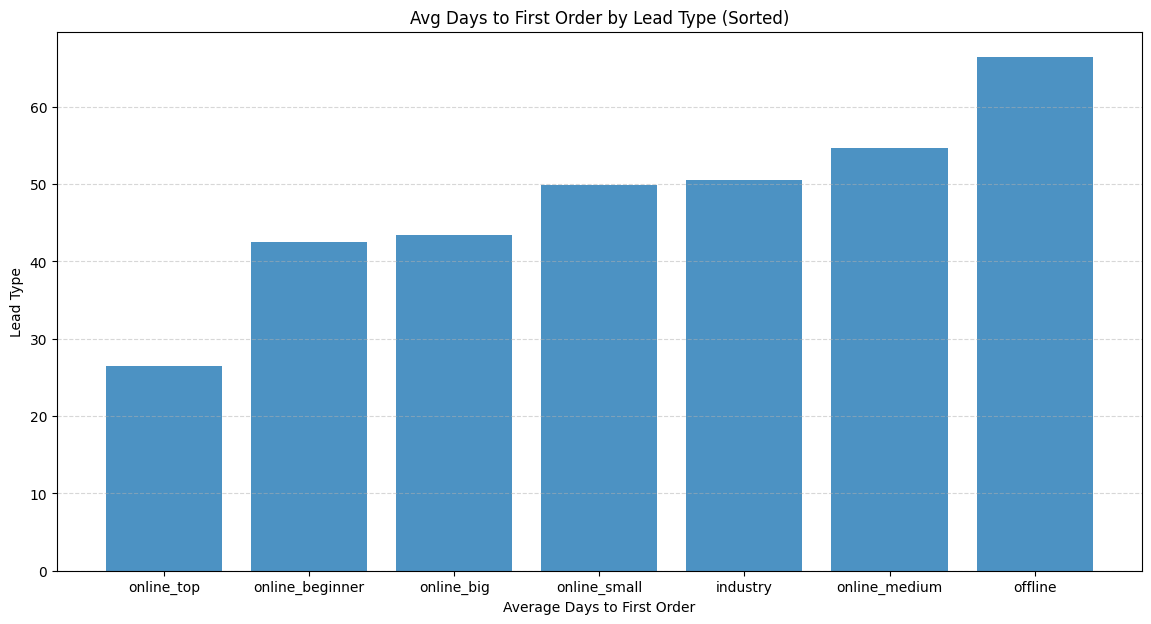

In [50]:

leadtype_sorted = leadtype_analyse.sort_values("first_order_days", ascending=True)

plt.figure(figsize=(14, 7))

plt.bar(
    leadtype_sorted["lead_type"],
    leadtype_sorted["first_order_days"],
    alpha=0.8
)

plt.xlabel("Average Days to First Order")
plt.ylabel("Lead Type")
plt.title("Avg Days to First Order by Lead Type (Sorted)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

- While it is true that **online_top** sellers convert the fastest, the fact that **online_medium** converts slower than **industry** sellers indicates that not all online leads behave the same — some still require significant activation effort despite having prior online selling experience.


- Lastly, the most important factor - the price, while many people believe that price can affect time-to-first order, in this case, the data show no correlation between price and time to first order.

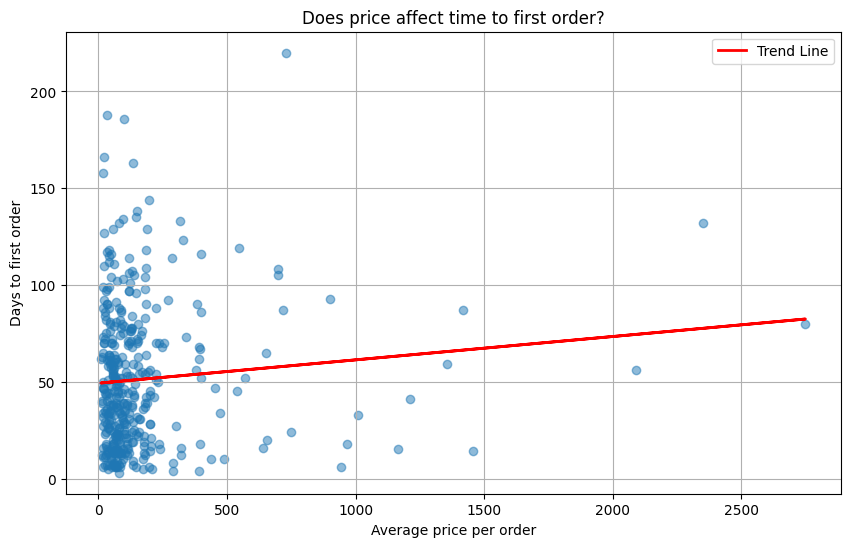

In [51]:


plt.figure(figsize=(10, 6))

# Scatter
x = df_seller_analyse["avg_price_per_order"]
y = df_seller_analyse["first_order_days"]

plt.scatter(x, y, alpha=0.5)

# ---- Regression line ----
m, b = np.polyfit(x, y, 1)     # m = slope, b = intercept
plt.plot(x, m*x + b, color='red', linewidth=2, label="Trend Line")

plt.xlabel("Average price per order")
plt.ylabel("Days to first order")
plt.title("Does price affect time to first order?")
plt.grid(True)
plt.legend()

plt.show()


- The trend line shows a very weak positive relationship between price and time to first order. This suggests that higher-priced items *may* take slightly longer to sell, but overall the effect is minimal. Most variation in time-to-first-order is not explained by price alone.


# 2. Retention rate analysis after first-order (Incubation phase)

- Month-to-month retention shows whether users stay engaged after the initial period.
- High retention = loyalty, stable revenue, strong cohorts.
- Low retention = weak value and higher churn risk.


In [52]:
df_seller_analyse.head(5)

,index,seller_id,order_count,total_price,avg_price_per_order,won_date_x,first_order_days,bucket,mql_id,sdr_id,...,won_date_y,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,0,01266d4c46afa519678d16a8b683d325,3,90.25,30.083333,2018-05-18 20:02:04,75,60+ days,ae437864746ae2a9e694a6ed2b5824db,4b339f9567d060bcea4f5136b9f5949e,...,2018-05-18 20:02:04,construction_tools_house_garden,online_small,cat,NaN,NaN,NaN,reseller,NaN,0.0
1,1,01fd077212124329bac32490e8ef80d9,39,1208.00,30.974359,2018-03-28 22:45:45,18,15–30 days,180d9ac0990bb42907fe9cc7aa3eb5a1,09285259593c61296eef10c734121d5b,...,2018-03-28 22:45:45,household_utilities,online_medium,cat,NaN,NaN,NaN,reseller,NaN,0.0
2,2,02f623a8eb246f3c5f7c2f96462654e6,44,6378.00,144.954545,2018-04-18 20:16:19,6,0–7 days,ffdd99e05df27c02a2fb1669d49e0c76,370c9f455f93a9a96cbe9bea48e70033,...,2018-04-18 20:16:19,sports_leisure,online_medium,eagle,NaN,NaN,NaN,reseller,NaN,0.0
3,3,03a2a6dcbe45d639c4dc2a0d24769c40,9,1078.41,119.823333,2018-02-09 18:11:10,31,31–60 days,586e57a7ef16035bd85e2dcf44248130,de63de0d10a6012430098db33c679b0b,...,2018-02-09 18:11:10,construction_tools_house_garden,online_beginner,NaN,NaN,NaN,NaN,reseller,NaN,0.0
4,4,044668ccd5316b12a7cf0d54a156e3e9,4,137.80,34.450000,2018-01-31 21:00:13,188,60+ days,5985e72b3752e4749926885db1b45be4,56bf83c4bb35763a51c2baab501b4c67,...,2018-01-31 21:00:13,food_drink,offline,NaN,NaN,NaN,NaN,reseller,NaN,0.0


In [63]:
order_retention_new = df_seller_analyse.merge(
    olist_order_items_dataset, on='seller_id', how='left'
)[['seller_id','order_id']]

order_retention_new = order_retention_new.merge(
    olist_orders_dataset, how='left', on='order_id'
)[['seller_id','order_id','order_purchase_timestamp']]
order_retention_new = order_retention_new.merge(
    df_seller_analyse[['seller_id', 'business_segment']],
    on='seller_id',
    how='left'
)

order_retention_new


,seller_id,order_id,order_purchase_timestamp,business_segment
0,01266d4c46afa519678d16a8b683d325,6826d5740591909e368433e2a5ec75fb,2018-08-02 16:07:38,construction_tools_house_garden
1,01266d4c46afa519678d16a8b683d325,d3582fd5ccccd9cb229a63dfb417c86f,2018-08-20 19:14:26,construction_tools_house_garden
2,01266d4c46afa519678d16a8b683d325,ed76528f7ed5ae1f2a0dd070a7426d44,2018-08-19 22:53:16,construction_tools_house_garden
3,01fd077212124329bac32490e8ef80d9,0c89556cf6859f7e4b104f2883aa1b97,2018-07-21 10:03:39,household_utilities
4,01fd077212124329bac32490e8ef80d9,0c89556cf6859f7e4b104f2883aa1b97,2018-07-21 10:03:39,household_utilities
...,...,...,...,...
5039,ffc470761de7d0232558ba5e786e57b7,e88f34a80788f768c175e94c622d7559,2018-04-11 13:22:20,construction_tools_house_garden
5040,ffc470761de7d0232558ba5e786e57b7,e88f34a80788f768c175e94c622d7559,2018-04-11 13:22:20,construction_tools_house_garden
5041,ffc470761de7d0232558ba5e786e57b7,ecb8849b9673c0bc2a510456938b508b,2018-06-27 13:28:51,construction_tools_house_garden
5042,ffc470761de7d0232558ba5e786e57b7,f7975233cce5d29114cc23919f1cc8d4,2018-04-09 16:12:20,construction_tools_house_garden


In [64]:
order_retention_new = order_retention_new.drop_duplicates()
order_retention_new

,seller_id,order_id,order_purchase_timestamp,business_segment
0,01266d4c46afa519678d16a8b683d325,6826d5740591909e368433e2a5ec75fb,2018-08-02 16:07:38,construction_tools_house_garden
1,01266d4c46afa519678d16a8b683d325,d3582fd5ccccd9cb229a63dfb417c86f,2018-08-20 19:14:26,construction_tools_house_garden
2,01266d4c46afa519678d16a8b683d325,ed76528f7ed5ae1f2a0dd070a7426d44,2018-08-19 22:53:16,construction_tools_house_garden
3,01fd077212124329bac32490e8ef80d9,0c89556cf6859f7e4b104f2883aa1b97,2018-07-21 10:03:39,household_utilities
5,01fd077212124329bac32490e8ef80d9,1cc625f985bb32e5e4d51ebd1914c21e,2018-08-07 10:00:25,household_utilities
...,...,...,...,...
5038,ffc470761de7d0232558ba5e786e57b7,e2a75ceae52579f722b2dedbdef56e20,2018-05-16 11:39:02,construction_tools_house_garden
5039,ffc470761de7d0232558ba5e786e57b7,e88f34a80788f768c175e94c622d7559,2018-04-11 13:22:20,construction_tools_house_garden
5041,ffc470761de7d0232558ba5e786e57b7,ecb8849b9673c0bc2a510456938b508b,2018-06-27 13:28:51,construction_tools_house_garden
5042,ffc470761de7d0232558ba5e786e57b7,f7975233cce5d29114cc23919f1cc8d4,2018-04-09 16:12:20,construction_tools_house_garden


In [65]:
df = order_retention_new.copy()

# Ensure datetime
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract month
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

# Cohort month (first ever order of seller)
df['cohort_month'] = df.groupby('seller_id')['order_month'].transform('min')

# Cohort index (# months since cohort start)
df['cohort_index'] = (
    (df['order_month'].dt.year - df['cohort_month'].dt.year) * 12 +
    (df['order_month'].dt.month - df['cohort_month'].dt.month)
)


In [66]:
cohort = (
    df.groupby(['cohort_month','cohort_index'])['seller_id']
      .nunique()
      .unstack(fill_value=0)
)

# Number of sellers in month 0
cohort_sizes = cohort[0]

# Retention %
retention = cohort.divide(cohort_sizes, axis=0) * 100

retention


cohort_index,0,1,2,3,4,5,6,7
cohort_month,,,,,,,,
2018-01,100.0,66.666667,66.666667,66.666667,100.000000,100.000000,33.333333,66.666667
2018-02,100.0,55.555556,70.370370,74.074074,74.074074,77.777778,59.259259,0.000000
2018-03,100.0,76.000000,76.000000,72.000000,56.000000,48.000000,0.000000,0.000000
2018-04,100.0,59.677419,66.129032,64.516129,62.903226,0.000000,0.000000,0.000000
2018-05,100.0,59.756098,63.414634,57.317073,0.000000,0.000000,0.000000,0.000000
2018-06,100.0,54.878049,69.512195,0.000000,0.000000,0.000000,0.000000,0.000000
2018-07,100.0,58.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-08,100.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


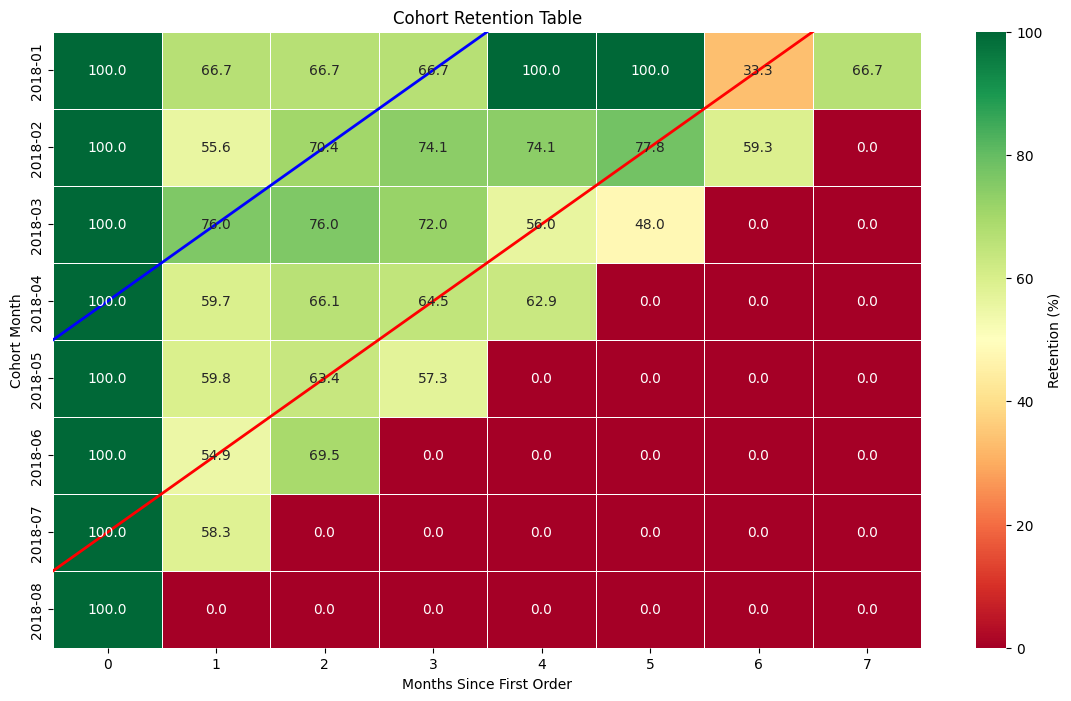

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))

# ----- VẼ HEATMAP -----
ax = sns.heatmap(
    retention, 
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    linewidths=0.5,
    cbar_kws={'label': 'Retention (%)'},
    vmax=100,
    vmin=0
)

plt.title("Cohort Retention Table")
plt.xlabel("Months Since First Order")
plt.ylabel("Cohort Month")

# ----- 2 ĐƯỜNG SONG SONG -----
n_rows, n_cols = retention.shape

# Đường 1 (đỏ) — baseline diagonal
y_start_1 = n_rows - 0.5
y_end_1   = -0.5

ax.plot(
    [-0.5, n_cols - 0.5],
    [y_start_1, y_end_1],
    linewidth=2,
    color='red'
)

# Đường 2 (xanh) — tịnh tiến lên nhiều hơn (song song)
offset = 3   # <<< CHỈNH TẠI ĐÂY: tăng offset để dịch đường xanh lên cao hơn
y_start_2 = y_start_1 - offset
y_end_2   = y_end_1 - offset

ax.plot(
    [-0.5, n_cols - 0.5],
    [y_start_2, y_end_2],
    linewidth=2,
    color='blue'
)

plt.show()


- The area between the two lines shows the strongest retention
- Cohorts from Feb–May 2018, especially in Month 1–3, retain significantly better than the cohorts above or below.

=>This forms a clear seasonal retention pocket.


This makes sense, since looking at the seasonal purchaisng pattern of Brazil, Mother’s Day is the second most profitable commercial season in Brazil.

E-commerce website sales from the two weeks prior to May 11th 2014 amounted for BRL 1,6 billion, which represents an increase of 55% in revenue when compared to the previous year. Highest selling categories for this period include **fashion and accessories, domestic appliances, cosmetics, cell phones and computers**.



- In order to confirm this assumption I decided to see which business categories is the most sell in April and May:

In [57]:
olist_products_dataset

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [58]:
olist_order_items_dataset = olist_order_items_dataset.merge(olist_products_dataset, on = 'product_id', how = 'left')
olist_order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [59]:
product_category_analyse = olist_order_items_dataset.merge(product_category_name_translation, on='product_category_name', how='left')[['product_category_name_english', 'product_id', 'price','shipping_limit_date']]
product_category_analyse

,product_category_name_english,product_id,price,shipping_limit_date
0,cool_stuff,4244733e06e7ecb4970a6e2683c13e61,58.90,2017-09-19 09:45:35
1,pet_shop,e5f2d52b802189ee658865ca93d83a8f,239.90,2017-05-03 11:05:13
2,furniture_decor,c777355d18b72b67abbeef9df44fd0fd,199.00,2018-01-18 14:48:30
3,perfumery,7634da152a4610f1595efa32f14722fc,12.99,2018-08-15 10:10:18
4,garden_tools,ac6c3623068f30de03045865e4e10089,199.90,2017-02-13 13:57:51
...,...,...,...,...
112645,housewares,4aa6014eceb682077f9dc4bffebc05b0,299.99,2018-05-02 04:11:01
112646,computers_accessories,32e07fd915822b0765e448c4dd74c828,350.00,2018-07-20 04:31:48
112647,sports_leisure,72a30483855e2eafc67aee5dc2560482,99.90,2017-10-30 17:14:25
112648,computers_accessories,9c422a519119dcad7575db5af1ba540e,55.99,2017-08-21 00:04:32


In [60]:

product_category_analyse['shipping_limit_date'] = pd.to_datetime(product_category_analyse['shipping_limit_date'])
apr_may = product_category_analyse[
    product_category_analyse['shipping_limit_date'].dt.month.isin([4, 5])
]

apr_may.head(5)


,product_category_name_english,product_id,price,shipping_limit_date
1,pet_shop,e5f2d52b802189ee658865ca93d83a8f,239.9,2017-05-03 11:05:13
5,housewares,ef92defde845ab8450f9d70c526ef70f,21.9,2017-05-23 03:55:27
16,consoles_games,3f27ac8e699df3d300ec4a5d8c5cf0b2,639.0,2018-05-02 09:31:53
17,perfumery,4fa33915031a8cde03dd0d3e8fb27f01,144.0,2018-05-16 20:57:03
31,furniture_decor,28b4eced95a52d9c437a4caf9d311b95,59.9,2018-04-12 19:08:28


In [72]:
apr_may_top_category = apr_may.groupby('product_category_name_english')['product_id'].size().reset_index().sort_values('product_id', ascending=False)
apr_may_top_category

,product_category_name_english,product_id
7,bed_bath_table,2155
43,health_beauty,1938
39,furniture_decor,1694
64,sports_leisure,1673
49,housewares,1528
...,...,...
52,la_cuisine,4
3,arts_and_craftmanship,3
41,furniture_mattress_and_upholstery,2
29,fashion_childrens_clothes,1


In [73]:
apr_may_top_category = apr_may_top_category.rename(columns={'product_id': 'count'})
# Top 30 categories
top30 = apr_may_top_category.head(30).copy()

# Tính phần trăm
top30['percent'] = top30['count'] / top30['count'].sum() * 100

top30


,product_category_name_english,count,percent
7,bed_bath_table,2155,10.161260
43,health_beauty,1938,9.138061
39,furniture_decor,1694,7.987552
64,sports_leisure,1673,7.888533
49,housewares,1528,7.204828
15,computers_accessories,1512,7.129385
69,watches_gifts,1348,6.356092
67,telephony,950,4.479442
5,auto,906,4.271973
42,garden_tools,867,4.088080


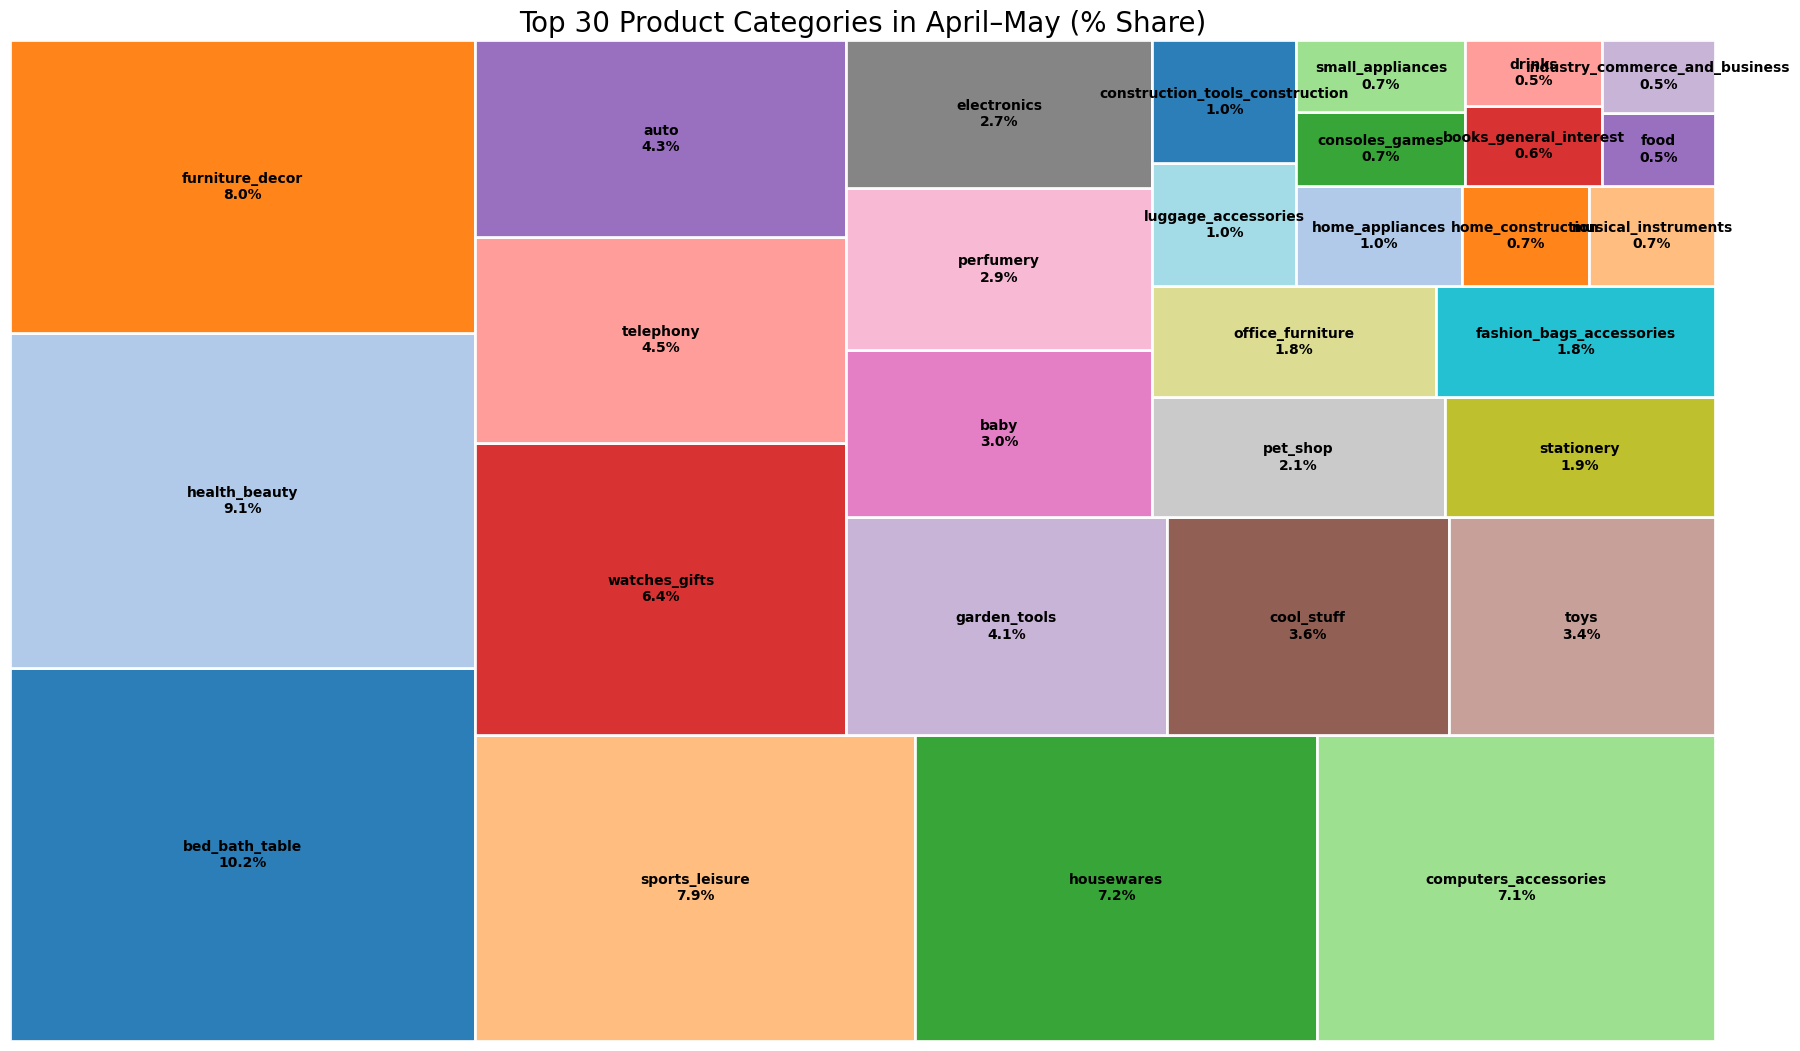

In [74]:
import matplotlib.pyplot as plt
import squarify
import numpy as np

sizes = top30['count']
labels = [
    f"{name}\n{percent:.1f}%"
    for name, percent in zip(top30['product_category_name_english'], top30['percent'])
]

cmap = plt.cm.tab20
colors = [cmap(i % cmap.N) for i in range(len(top30))]

plt.figure(figsize=(22, 13))

squarify.plot(
    sizes=sizes,
    label=labels,
    color=colors,
    alpha=0.95,
    text_kwargs={'fontsize': 10, 'weight': 'bold'},
    edgecolor='white',     
    linewidth=2
)

plt.title("Top 30 Product Categories in April–May (% Share)", fontsize=20)
plt.axis('off')
plt.show()




Seasonality Insight

- Feb–May cohorts show higher retention.

- Top Apr–May categories (home goods, beauty, gifts, electronics) match Brazil’s Mother’s Day season.

- This supports a seasonal-driven retention boost.